<a href="https://colab.research.google.com/github/sdasmaha/MLgroupIOSimplementation/blob/master/a_heat_map_to_visualize_mean_crowdedness.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Visualizing the Busyness in a gym with a heatmap by the hour and the day of the week so DP4CoRuNa APP users can be aware.



In [ ]:

import numpy as np
import pandas as pd 
import seaborn as sns

from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))


data.csv



In [ ]:
df = pd.read_csv('../input/data.csv')

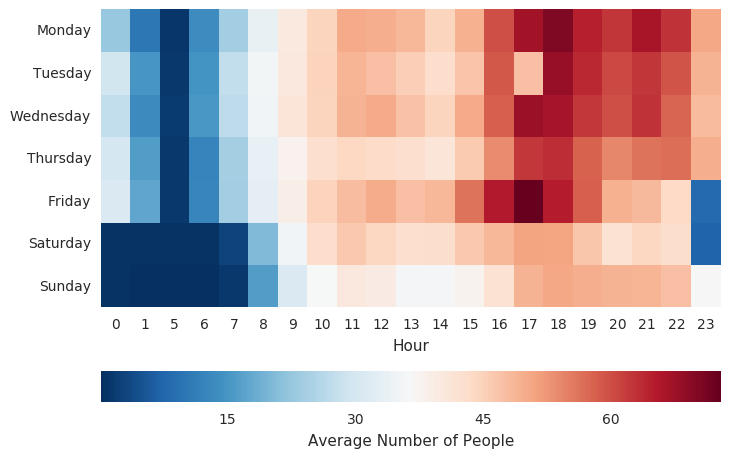

In [ ]:
#analyze time in hours instead of seconds
df['Hour'] = df.timestamp.apply( lambda x: int(np.floor(x/3600))) 

g = df[['Hour','number_people','day_of_week']]

#Group by tme and day
F = g.groupby(['Hour','day_of_week'], as_index = False).number_people.mean().pivot('day_of_week','Hour', 'number_people').fillna(0)


grid_kws = {"height_ratios": (.9, .05), "hspace": .3}

dow= 'Monday Tuesday Wednesday Thursday Friday Saturday Sunday'.split()
dow.reverse()

ax = sns.heatmap(F, cmap='RdBu_r',cbar_kws={"orientation": "horizontal"})
ax.set_yticklabels(dow, rotation = 0)
ax.set_ylabel('')
ax.set_xlabel('Hour')

cbar = ax.collections[0].colorbar
cbar.set_label('Average Number of People')

What are the rates of change for each day?  This will show us when the gym is getting busy, and when it is slowing down. 

Plotting the gradient to calculate the partial derivative of this scalar field.

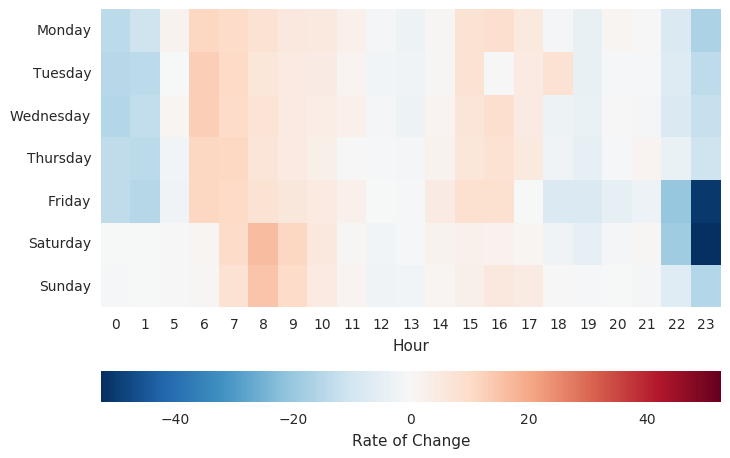

In [ ]:
lwise = np.gradient(F, edge_order = 2)[1]
Fp = pd.DataFrame(lwise, columns=F.columns, index = F.index)


ax = sns.heatmap(Fp, cmap='RdBu_r',cbar_kws={"orientation": "horizontal"})
ax.set_yticklabels(dow, rotation = 0)
ax.set_ylabel('')
ax.set_xlabel('Hour')

cbar = ax.collections[0].colorbar
cbar.set_label('Rate of Change')

Best times to go to the gym are around 8 am or 10am. Not too many people, and no one is on their way in.  If you go around 1 pm or 2 pm, get in and get out because there are a lot of people on their way.